# Profit-Maximizing Bid Function
### Matt Lee
### ENGY 615 - Dr. Puller

In [35]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import json

In [36]:
# Read the portfolio data
with open(r".\puller_exam_porfolio_data.json", 'r') as f:
    data = json.load(f)

# Create a comprehensive dataframe with all data
all_units = []
for portfolio, units in data.items():
    for unit in units:
        unit_copy = unit.copy()
        unit_copy['Portfolio'] = portfolio
        all_units.append(unit_copy)

# Create main dataframe
df_all = pd.DataFrame(all_units)
df_all = df_all[['Portfolio', 'Unit Name', 'Capacity (MW)', 'Marginal Cost ($/MWH)',
                  'Carbon (tons/MWH)', 'O&M/Day ($)', 'Fuel']]

# Create sub-section dataframes for easy indexing
portfolios = {}
portfolios['Big Coal'] = pd.DataFrame(data['Big Coal'])
portfolios['Big Gas'] = pd.DataFrame(data['Big Gas'])
portfolios['Bay Views'] = pd.DataFrame(data['Bay Views'])
portfolios['Beachfront'] = pd.DataFrame(data['Beachfront'])
portfolios['East Bay'] = pd.DataFrame(data['East Bay'])
portfolios['Old Timers'] = pd.DataFrame(data['Old Timers'])
portfolios['Fossil Light'] = pd.DataFrame(data['Fossil Light'])

# Print the complete table
print("=" * 120)
print("Cost of Capacities of Each Portfolio".center(120))
print("=" * 120)
print()

for portfolio_name, portfolio_df in portfolios.items():
    print(f"\n{portfolio_name}")
    print("-" * 120)
    print(portfolio_df.to_string(index=False))
    print()


                                          Cost of Capacities of Each Portfolio                                          


Big Coal
------------------------------------------------------------------------------------------------------------------------
           Unit Name  Capacity (MW)  Marginal Cost ($/MWH)  Carbon (tons/MWH)  O&M/Day ($) Fuel
        FOUR CORNERS           1900                  36.50               1.10         8000 Coal
          ALAMITOS 7            250                  73.72               0.85            0  Gas
HUNTINGTON BEACH 1&2            300                  40.50               0.46         2000  Gas
  HUNTINGTON BEACH 5            150                  66.50               0.77         2000  Gas
         REDONDO 5&6            350                  41.94               0.48         3000  Gas
         REDONDO 7&8            950                  41.94               0.48         5000  Gas


Big Gas
-----------------------------------------------------------------

## Market Clearing Price Calculation

We need to determine the optimal market clearing price by analyzing the rival supply stack and the residual demand curve.

In [37]:
# Step A: Identify Rivals
# We own "Big Gas", so rivals are all other portfolios
print("=" * 120)
print("STEP A: IDENTIFY YOUR RIVALS".center(120))
print("=" * 120)
print("\nYou own: Big Gas")
print("\nYour rivals are:")
rival_portfolio_names = ['Big Coal', 'Bay Views', 'Beachfront', 'East Bay', 'Old Timers', 'Fossil Light']
for i, name in enumerate(rival_portfolio_names, 1):
    print(f"  {i}. {name}")
print()

                                              STEP A: IDENTIFY YOUR RIVALS                                              

You own: Big Gas

Your rivals are:
  1. Big Coal
  2. Bay Views
  3. Beachfront
  4. East Bay
  5. Old Timers
  6. Fossil Light



In [38]:
# Step B: Calculate Rival Bids (The Supply Stack)
# Rivals bid at MC × 1.10
print("\n" + "=" * 120)
print("STEP B: CALCULATE RIVAL BIDS (MC × 1.10)".center(120))
print("=" * 120)
print("\nFormula: Bid_rival = MC × 1.10")
print("\nSample calculations:")

# Collect all rival units with bids
rival_units_list = []
for portfolio_name in rival_portfolio_names:
    portfolio_df = portfolios[portfolio_name]
    for idx, unit in portfolio_df.iterrows():
        mc = unit['Marginal Cost ($/MWH)']
        bid_price = mc * 1.10
        rival_units_list.append({
            'Portfolio': portfolio_name,
            'Unit Name': unit['Unit Name'],
            'Fuel': unit['Fuel'],
            'Capacity (MW)': unit['Capacity (MW)'],
            'MC ($/MWh)': mc,
            'Bid Price ($/MWh)': bid_price
        })

# Show some examples
df_rival_bids = pd.DataFrame(rival_units_list)
print("\nExamples:")
print(f"  • {df_rival_bids.loc[0, 'Portfolio']} / {df_rival_bids.loc[0, 'Unit Name']} ({df_rival_bids.loc[0, 'Fuel']}):")
print(f"    - Capacity: {df_rival_bids.loc[0, 'Capacity (MW)']:.0f} MW")
print(f"    - MC: ${df_rival_bids.loc[0, 'MC ($/MWh)']:.2f}")
print(f"    - Bid: ${df_rival_bids.loc[0, 'MC ($/MWh)']:.2f} × 1.10 = ${df_rival_bids.loc[0, 'Bid Price ($/MWh)']:.2f}")

# Find a nuclear example
nuclear_idx = df_rival_bids[df_rival_bids['Fuel'] == 'Nuclear'].index[0]
print(f"\n  • {df_rival_bids.loc[nuclear_idx, 'Portfolio']} / {df_rival_bids.loc[nuclear_idx, 'Unit Name']} ({df_rival_bids.loc[nuclear_idx, 'Fuel']}):")
print(f"    - Capacity: {df_rival_bids.loc[nuclear_idx, 'Capacity (MW)']:.0f} MW")
print(f"    - MC: ${df_rival_bids.loc[nuclear_idx, 'MC ($/MWh)']:.2f}")
print(f"    - Bid: ${df_rival_bids.loc[nuclear_idx, 'MC ($/MWh)']:.2f} × 1.10 = ${df_rival_bids.loc[nuclear_idx, 'Bid Price ($/MWh)']:.2f}")

# Find a coal example
coal_idx = df_rival_bids[df_rival_bids['Fuel'] == 'Coal'].index[0]
print(f"\n  • {df_rival_bids.loc[coal_idx, 'Portfolio']} / {df_rival_bids.loc[coal_idx, 'Unit Name']} ({df_rival_bids.loc[coal_idx, 'Fuel']}):")
print(f"    - Capacity: {df_rival_bids.loc[coal_idx, 'Capacity (MW)']:.0f} MW")
print(f"    - MC: ${df_rival_bids.loc[coal_idx, 'MC ($/MWh)']:.2f}")
print(f"    - Bid: ${df_rival_bids.loc[coal_idx, 'MC ($/MWh)']:.2f} × 1.10 = ${df_rival_bids.loc[coal_idx, 'Bid Price ($/MWh)']:.2f}")

print(f"\nTotal rival units: {len(df_rival_bids)}")
print()


                                        STEP B: CALCULATE RIVAL BIDS (MC × 1.10)                                        

Formula: Bid_rival = MC × 1.10

Sample calculations:

Examples:
  • Big Coal / FOUR CORNERS (Coal):
    - Capacity: 1900 MW
    - MC: $36.50
    - Bid: $36.50 × 1.10 = $40.15

  • Fossil Light / DIABLO CANYON 1 (Nuclear):
    - Capacity: 1000 MW
    - MC: $11.50
    - Bid: $11.50 × 1.10 = $12.65

  • Big Coal / FOUR CORNERS (Coal):
    - Capacity: 1900 MW
    - MC: $36.50
    - Bid: $36.50 × 1.10 = $40.15

Total rival units: 35



In [39]:
# Step C: Sort and Aggregate (S_others)
print("\n" + "=" * 120)
print("STEP C: SORT AND AGGREGATE RIVAL SUPPLY (S_others)".center(120))
print("=" * 120)

# Sort by bid price and calculate cumulative capacity
df_rival_supply = df_rival_bids.sort_values('Bid Price ($/MWh)').reset_index(drop=True)
df_rival_supply['Cumulative Capacity (MW)'] = df_rival_supply['Capacity (MW)'].cumsum()

print("\nRival Supply Stack (sorted by bid price):")
print("-" * 120)
print(df_rival_supply[['Portfolio', 'Unit Name', 'Capacity (MW)', 'MC ($/MWh)',
                        'Bid Price ($/MWh)', 'Cumulative Capacity (MW)']].to_string(index=False))
print()

# Find key price points
print("\n" + "=" * 120)
print("KEY PRICE POINTS IN RIVAL SUPPLY STACK".center(120))
print("=" * 120)

# Find the gap where we should bid
for i in range(len(df_rival_supply) - 1):
    current_bid = df_rival_supply.loc[i, 'Bid Price ($/MWh)']
    next_bid = df_rival_supply.loc[i + 1, 'Bid Price ($/MWh)']
    gap = next_bid - current_bid

    # Look for significant gaps near $60-65 range
    if 55 < current_bid < 70 and gap > 4:
        print(f"\n✓ STRATEGIC GAP IDENTIFIED:")
        print(f"  Last unit below gap: {df_rival_supply.loc[i, 'Unit Name']} ({df_rival_supply.loc[i, 'Portfolio']})")
        print(f"    - Bid: ${current_bid:.2f}/MWh")
        print(f"    - Cumulative capacity: {df_rival_supply.loc[i, 'Cumulative Capacity (MW)']:,.0f} MW")
        print(f"\n  Next unit above gap: {df_rival_supply.loc[i + 1, 'Unit Name']} ({df_rival_supply.loc[i + 1, 'Portfolio']})")
        print(f"    - Bid: ${next_bid:.2f}/MWh")
        print(f"    - Cumulative capacity: {df_rival_supply.loc[i + 1, 'Cumulative Capacity (MW)']:,.0f} MW")
        print(f"\n  Gap size: ${gap:.2f}/MWh")
        print(f"\n  💡 OPPORTUNITY: Bid just below ${next_bid:.2f} to capture residual demand at high price!")

print()


                                   STEP C: SORT AND AGGREGATE RIVAL SUPPLY (S_others)                                   

Rival Supply Stack (sorted by bid price):
------------------------------------------------------------------------------------------------------------------------
   Portfolio            Unit Name  Capacity (MW)  MC ($/MWh)  Bid Price ($/MWh)  Cumulative Capacity (MW)
  Old Timers            BIG CREEK           1000        0.00              0.000                      1000
Fossil Light                HELMS            800        0.50              0.550                      1800
Fossil Light      DIABLO CANYON 1           1000       11.50             12.650                      2800
   Bay Views       MOSS LANDING 7            750       32.56             35.816                      3550
   Bay Views       MOSS LANDING 6            750       32.56             35.816                      4300
  Old Timers             MOHAVE 2            750       34.50             37.95

## Big Gas Profit-Maximizing Bid Strategy

### Executive Summary
- **Calculated Market Clearing Price**: $64.10 / MWh (just below the bid as discovered above)
- **Total Market Demand:**
$$Q = 18,341 - 5.69(64.10) \approx \mathbf{17,976 \text{ MW}}$$
- **Our Residual Demand:**
$$RD = Q_D - S_{others} = 17,976 - 16,200 = \mathbf{1,776 \text{ MW}}$$

### Strategy: Limit Pricing
The optimal strategy is to undercut the expensive rival units (Contra Costa 4&5 @ $64.11) by bidding just below at $64.10.

In [40]:
# Big Gas Portfolio - Profit Maximizing Bid Function
big_gas_df = portfolios['Big Gas'].copy()

# Sort by Marginal Cost (merit order)
big_gas_df = big_gas_df.sort_values('Marginal Cost ($/MWH)').reset_index(drop=True)

# Create the bid function based on the strategy
# Strategy: Bid cheap units at MC, marginal unit at $64.10, expensive units out of market
bid_function = []

for idx, unit in big_gas_df.iterrows():
    unit_name = unit['Unit Name']
    capacity = unit['Capacity (MW)']
    mc = unit['Marginal Cost ($/MWH)']

    if unit_name in ['EL SEGUNDO 3&4', 'ENCINA']:
        # Base load units - bid at marginal cost
        bid_price = mc
        strategy = 'Bid MC (Base Load)'
    elif unit_name == 'SOUTH BAY':
        # Strategic marginal unit - bid to set market price
        bid_price = 64.10
        strategy = 'Strategic Bid (Sets Price)'
    else:
        # Withhold expensive units from market
        bid_price = 99.00
        strategy = 'Economic Withholding'

    bid_function.append({
        'Unit Name': unit_name,
        'Capacity (MW)': capacity,
        'Marginal Cost ($/MWH)': mc,
        'Bid Price ($/MWh)': bid_price,
        'Strategy': strategy
    })

df_bid = pd.DataFrame(bid_function)
df_bid['Cumulative Capacity (MW)'] = df_bid['Capacity (MW)'].cumsum()

print("=" * 120)
print("Big Gas Profit-Maximizing Bid Function".center(120))
print("=" * 120)
print(df_bid.to_string(index=False))
print()

# Calculate market equilibrium at P = $64.10
price_eq = 64.10
q_demand = 18341 - 5.69 * price_eq
rival_supply = 16200  # From rival analysis
residual_demand = q_demand - rival_supply

print("\n" + "=" * 120)
print("Market Equilibrium Analysis at P = $64.10".center(120))
print("=" * 120)
print(f"\nTotal Market Demand: {q_demand:,.0f} MW")
print(f"Rival Supply: {rival_supply:,.0f} MW")
print(f"Residual Demand (Big Gas Output): {residual_demand:,.0f} MW")

# Calculate costs and profits
el_segundo_34_cost = 650 * 41.22
encina_cost = 950 * 41.67
south_bay_needed = residual_demand - 650 - 950
south_bay_cost = south_bay_needed * 43.83

total_cost = el_segundo_34_cost + encina_cost + south_bay_cost
revenue = residual_demand * price_eq
profit = revenue - total_cost

print(f"\nProduction Breakdown:")
print(f"  El Segundo 3&4: 650 MW @ ${41.22:.2f} MC = ${el_segundo_34_cost:,.0f}")
print(f"  Encina: 950 MW @ ${41.67:.2f} MC = ${encina_cost:,.0f}")
print(f"  South Bay: {south_bay_needed:.0f} MW @ ${43.83:.2f} MC = ${south_bay_cost:,.0f}")
print(f"\nTotal Cost: ${total_cost:,.0f}")
print(f"Revenue: {residual_demand:.0f} MW × ${price_eq:.2f} = ${revenue:,.0f}")
print(f"Hourly Profit: ${profit:,.0f}")
print()

                                         Big Gas Profit-Maximizing Bid Function                                         
     Unit Name  Capacity (MW)  Marginal Cost ($/MWH)  Bid Price ($/MWh)                   Strategy  Cumulative Capacity (MW)
EL SEGUNDO 3&4            650                  41.22              41.22         Bid MC (Base Load)                       650
        ENCINA            950                  41.67              41.67         Bid MC (Base Load)                      1600
     SOUTH BAY            700                  43.83              64.10 Strategic Bid (Sets Price)                      2300
EL SEGUNDO 1&2            400                  44.83              99.00       Economic Withholding                      2700
    LONG BEACH            550                  52.50              99.00       Economic Withholding                      3250
  NORTH ISLAND            150                  65.50              99.00       Economic Withholding                      3400
    

In [42]:
# Create comprehensive supply curve visualization
# Combine rivals + Big Gas bids

# First, create df_rivals from all portfolios except Big Gas
rival_portfolios = ['Big Coal', 'Bay Views', 'Beachfront', 'East Bay', 'Old Timers', 'Fossil Light']
rival_units = []
for portfolio_name in rival_portfolios:
    portfolio_df = portfolios[portfolio_name]
    for _, unit in portfolio_df.iterrows():
        rival_units.append({
            'Portfolio': portfolio_name,
            'Unit Name': unit['Unit Name'],
            'Capacity (MW)': unit['Capacity (MW)'],
            'Marginal Cost ($/MWH)': unit['Marginal Cost ($/MWH)'],
            'Bid Price ($/MWH)': unit['Marginal Cost ($/MWH)'] * 1.10,  # Rivals bid at MC + 10%
            'Fuel': unit['Fuel']
        })

df_rivals = pd.DataFrame(rival_units)
df_rivals = df_rivals.sort_values('Bid Price ($/MWH)').reset_index(drop=True)

# Create aggregate supply curve (rivals + Big Gas)
aggregate_supply = []

# Add rival units
for _, unit in df_rivals.iterrows():
    aggregate_supply.append({
        'Unit Name': unit['Unit Name'],
        'Portfolio': unit['Portfolio'],
        'Capacity (MW)': unit['Capacity (MW)'],
        'Bid Price ($/MWh)': unit['Bid Price ($/MWH)']
    })

# Add Big Gas units
for _, unit in df_bid.iterrows():
    aggregate_supply.append({
        'Unit Name': unit['Unit Name'],
        'Portfolio': 'Big Gas',
        'Capacity (MW)': unit['Capacity (MW)'],
        'Bid Price ($/MWh)': unit['Bid Price ($/MWh)']
    })

# Sort by bid price and calculate cumulative capacity
df_aggregate = pd.DataFrame(aggregate_supply)
df_aggregate = df_aggregate.sort_values('Bid Price ($/MWh)').reset_index(drop=True)
df_aggregate['Cumulative Capacity (MW)'] = df_aggregate['Capacity (MW)'].cumsum()

# Create step function for supply curve
supply_x = [0]
supply_y = [0]

for _, row in df_aggregate.iterrows():
    # Horizontal line at current price
    supply_x.append(row['Cumulative Capacity (MW)'])
    supply_y.append(row['Bid Price ($/MWh)'])
    # Vertical line to next price
    if _ < len(df_aggregate) - 1:
        supply_x.append(row['Cumulative Capacity (MW)'])
        supply_y.append(df_aggregate.loc[_ + 1, 'Bid Price ($/MWh)'])

# Extend the last segment
supply_x.append(supply_x[-1])
supply_y.append(100)

# Create demand curve: Q = 18341 - 5.69P => P = (18341 - Q) / 5.69
demand_q = np.linspace(0, 20000, 100)
demand_p = (18341 - demand_q) / 5.69

# Find equilibrium
eq_price = 64.10
eq_quantity = 18341 - 5.69 * eq_price

# Create Big Gas MC step curve
big_gas_mc_x = [0]
big_gas_mc_y = [0]
cumulative_capacity = 0

for _, unit in df_bid.iterrows():
    # Horizontal line at current MC
    cumulative_capacity += unit['Capacity (MW)']
    big_gas_mc_x.append(cumulative_capacity)
    big_gas_mc_y.append(unit['Marginal Cost ($/MWH)'])
    # Vertical line to next MC
    if _ < len(df_bid) - 1:
        big_gas_mc_x.append(cumulative_capacity)
        big_gas_mc_y.append(df_bid.loc[_ + 1, 'Marginal Cost ($/MWH)'])

# Extend the last segment
big_gas_mc_x.append(cumulative_capacity)
big_gas_mc_y.append(big_gas_mc_y[-1])

# Create Big Gas bid step curve
big_gas_bid_x = [0]
big_gas_bid_y = [0]
cumulative_capacity_bid = 0

for _, unit in df_bid.iterrows():
    # Horizontal line at current bid price
    cumulative_capacity_bid += unit['Capacity (MW)']
    big_gas_bid_x.append(cumulative_capacity_bid)
    big_gas_bid_y.append(unit['Bid Price ($/MWh)'])
    # Vertical line to next bid price
    if _ < len(df_bid) - 1:
        big_gas_bid_x.append(cumulative_capacity_bid)
        big_gas_bid_y.append(df_bid.loc[_ + 1, 'Bid Price ($/MWh)'])

# Extend the last segment
big_gas_bid_x.append(cumulative_capacity_bid)
big_gas_bid_y.append(big_gas_bid_y[-1])

# Create the plot
fig = go.Figure()

# Big Gas Bid Function (step curve)
fig.add_trace(go.Scatter(
    x=big_gas_bid_x,
    y=big_gas_bid_y,
    mode='lines',
    name='Big Gas Bid Function',
    line=dict(color='red', width=2),
    hovertemplate='<b>Big Gas Bid</b><br>Q: %{x:.0f} MW<br>Bid: $%{y:.2f}/MWh<extra></extra>'
))

# Big Gas Marginal Cost curve
fig.add_trace(go.Scatter(
    x=big_gas_mc_x,
    y=big_gas_mc_y,
    mode='lines',
    name='Big Gas Marginal Cost',
    line=dict(color='deeppink', width=2, dash='solid'),
    hovertemplate='<b>Big Gas MC</b><br>Q: %{x:.0f} MW<br>MC: $%{y:.2f}/MWh<extra></extra>'
))

# Update layout
fig.update_layout(
    title={
        'text': 'Big Gas Bid Function vs Marginal Cost<br><sub>Profit-Maximizing Strategy</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    xaxis_title='Quantity (MW)',
    yaxis_title='Price ($/MWh)',
    xaxis=dict(
        range=[0, 4000],
        showgrid=True,
        gridcolor='lightgray',
        zeroline=True
    ),
    yaxis=dict(
        range=[0, 100],
        showgrid=True,
        gridcolor='lightgray',
        zeroline=True
    ),
    hovermode='closest',
    plot_bgcolor='white',
    width=1000,
    height=700,
    legend=dict(
        x=0.98,
        y=0.98,
        xanchor='right',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    )
)

fig.show()

print("\n" + "=" * 120)
print("Big Gas Bid Strategy Summary".center(120))
print("=" * 120)
print(f"\n✓ Strategic Bid Price: ${eq_price:.2f}/MWh")
print(f"✓ Expected Output: {residual_demand:,.0f} MW")
print(f"✓ Expected Hourly Profit: ${profit:,.0f}")
print()


                                              Big Gas Bid Strategy Summary                                              

✓ Strategic Bid Price: $64.10/MWh
✓ Expected Output: 1,776 MW
✓ Expected Hourly Profit: $39,754



In [5]:
import numpy as np
numbers = np.linspace(1, 300, 2000)
# plot the numbers
print(numbers)


[  1.           1.14957479   1.29914957 ... 299.70085043 299.85042521
 300.        ]


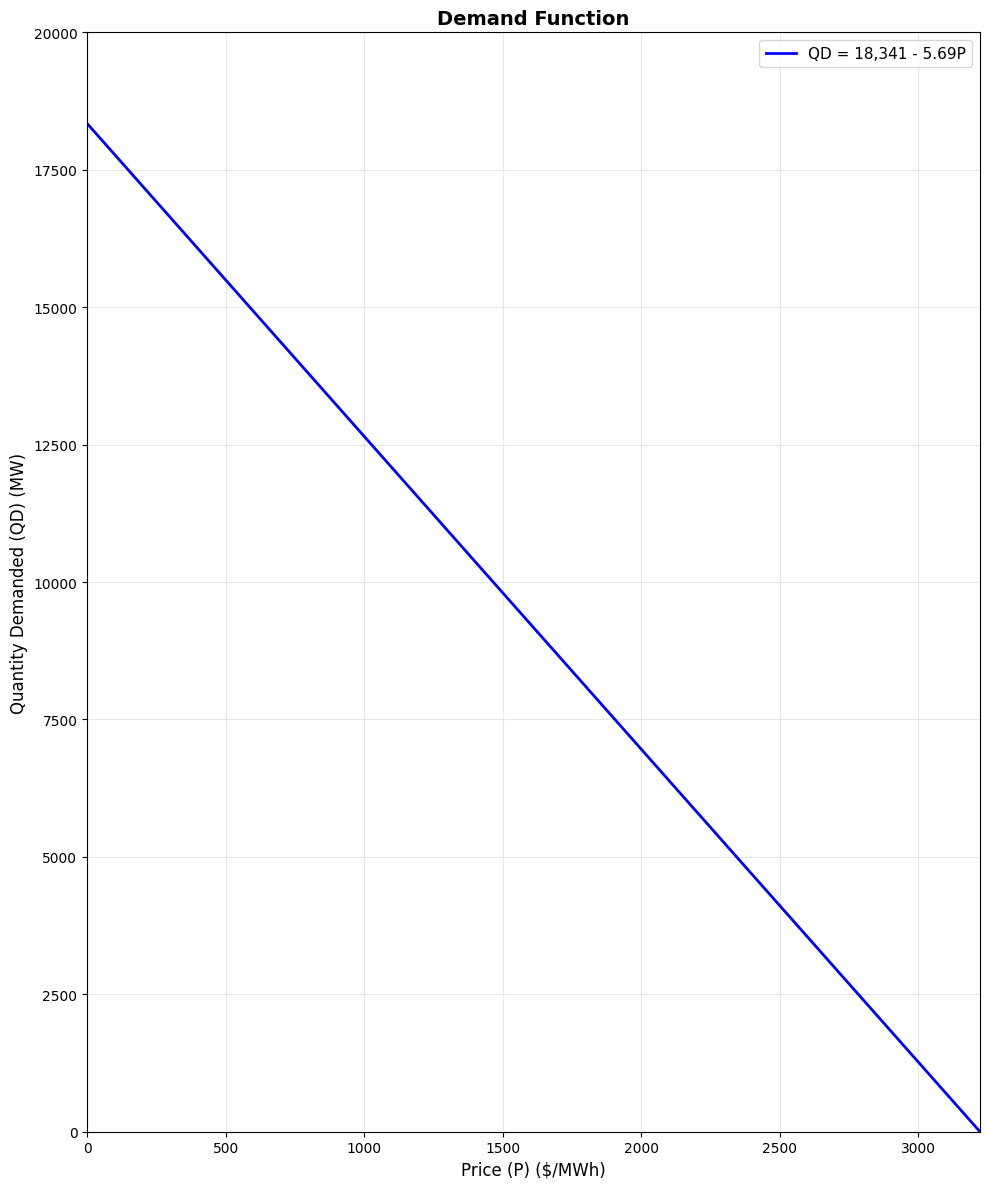

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the demand function: QD = 18,341 - 5.69P
def demand(P):
    return 18341 - 5.69 * P

# Create a range of prices (0 to max price where QD = 0)
max_price = 18341 / 5.69
prices = np.linspace(0, max_price, 500)
quantities = demand(prices)

# Create the plot with taller figure
plt.figure(figsize=(10, 12))
plt.plot(prices, quantities, 'b-', linewidth=2, label='QD = 18,341 - 5.69P')
plt.xlabel('Price (P) ($/MWh)', fontsize=12)
plt.ylabel('Quantity Demanded (QD) (MW)', fontsize=12)
plt.title('Demand Function', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
# plt.ylim(17500, 20000)
# plt.xlim(0, 100)
plt.ylim(0, 20000)
plt.xlim(0, max_price)
plt.tight_layout()
plt.show()